# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [132]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

## Preprocessing

First, we take a look at the data. We look at their structure and at any missing values (which their are none). Then, we scale all the feature values with a StandardScaler, since we don´t need any Robust  methods (there are no outliers that we can see in the pairplot).

In [133]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [134]:
crops["crop"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [135]:
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

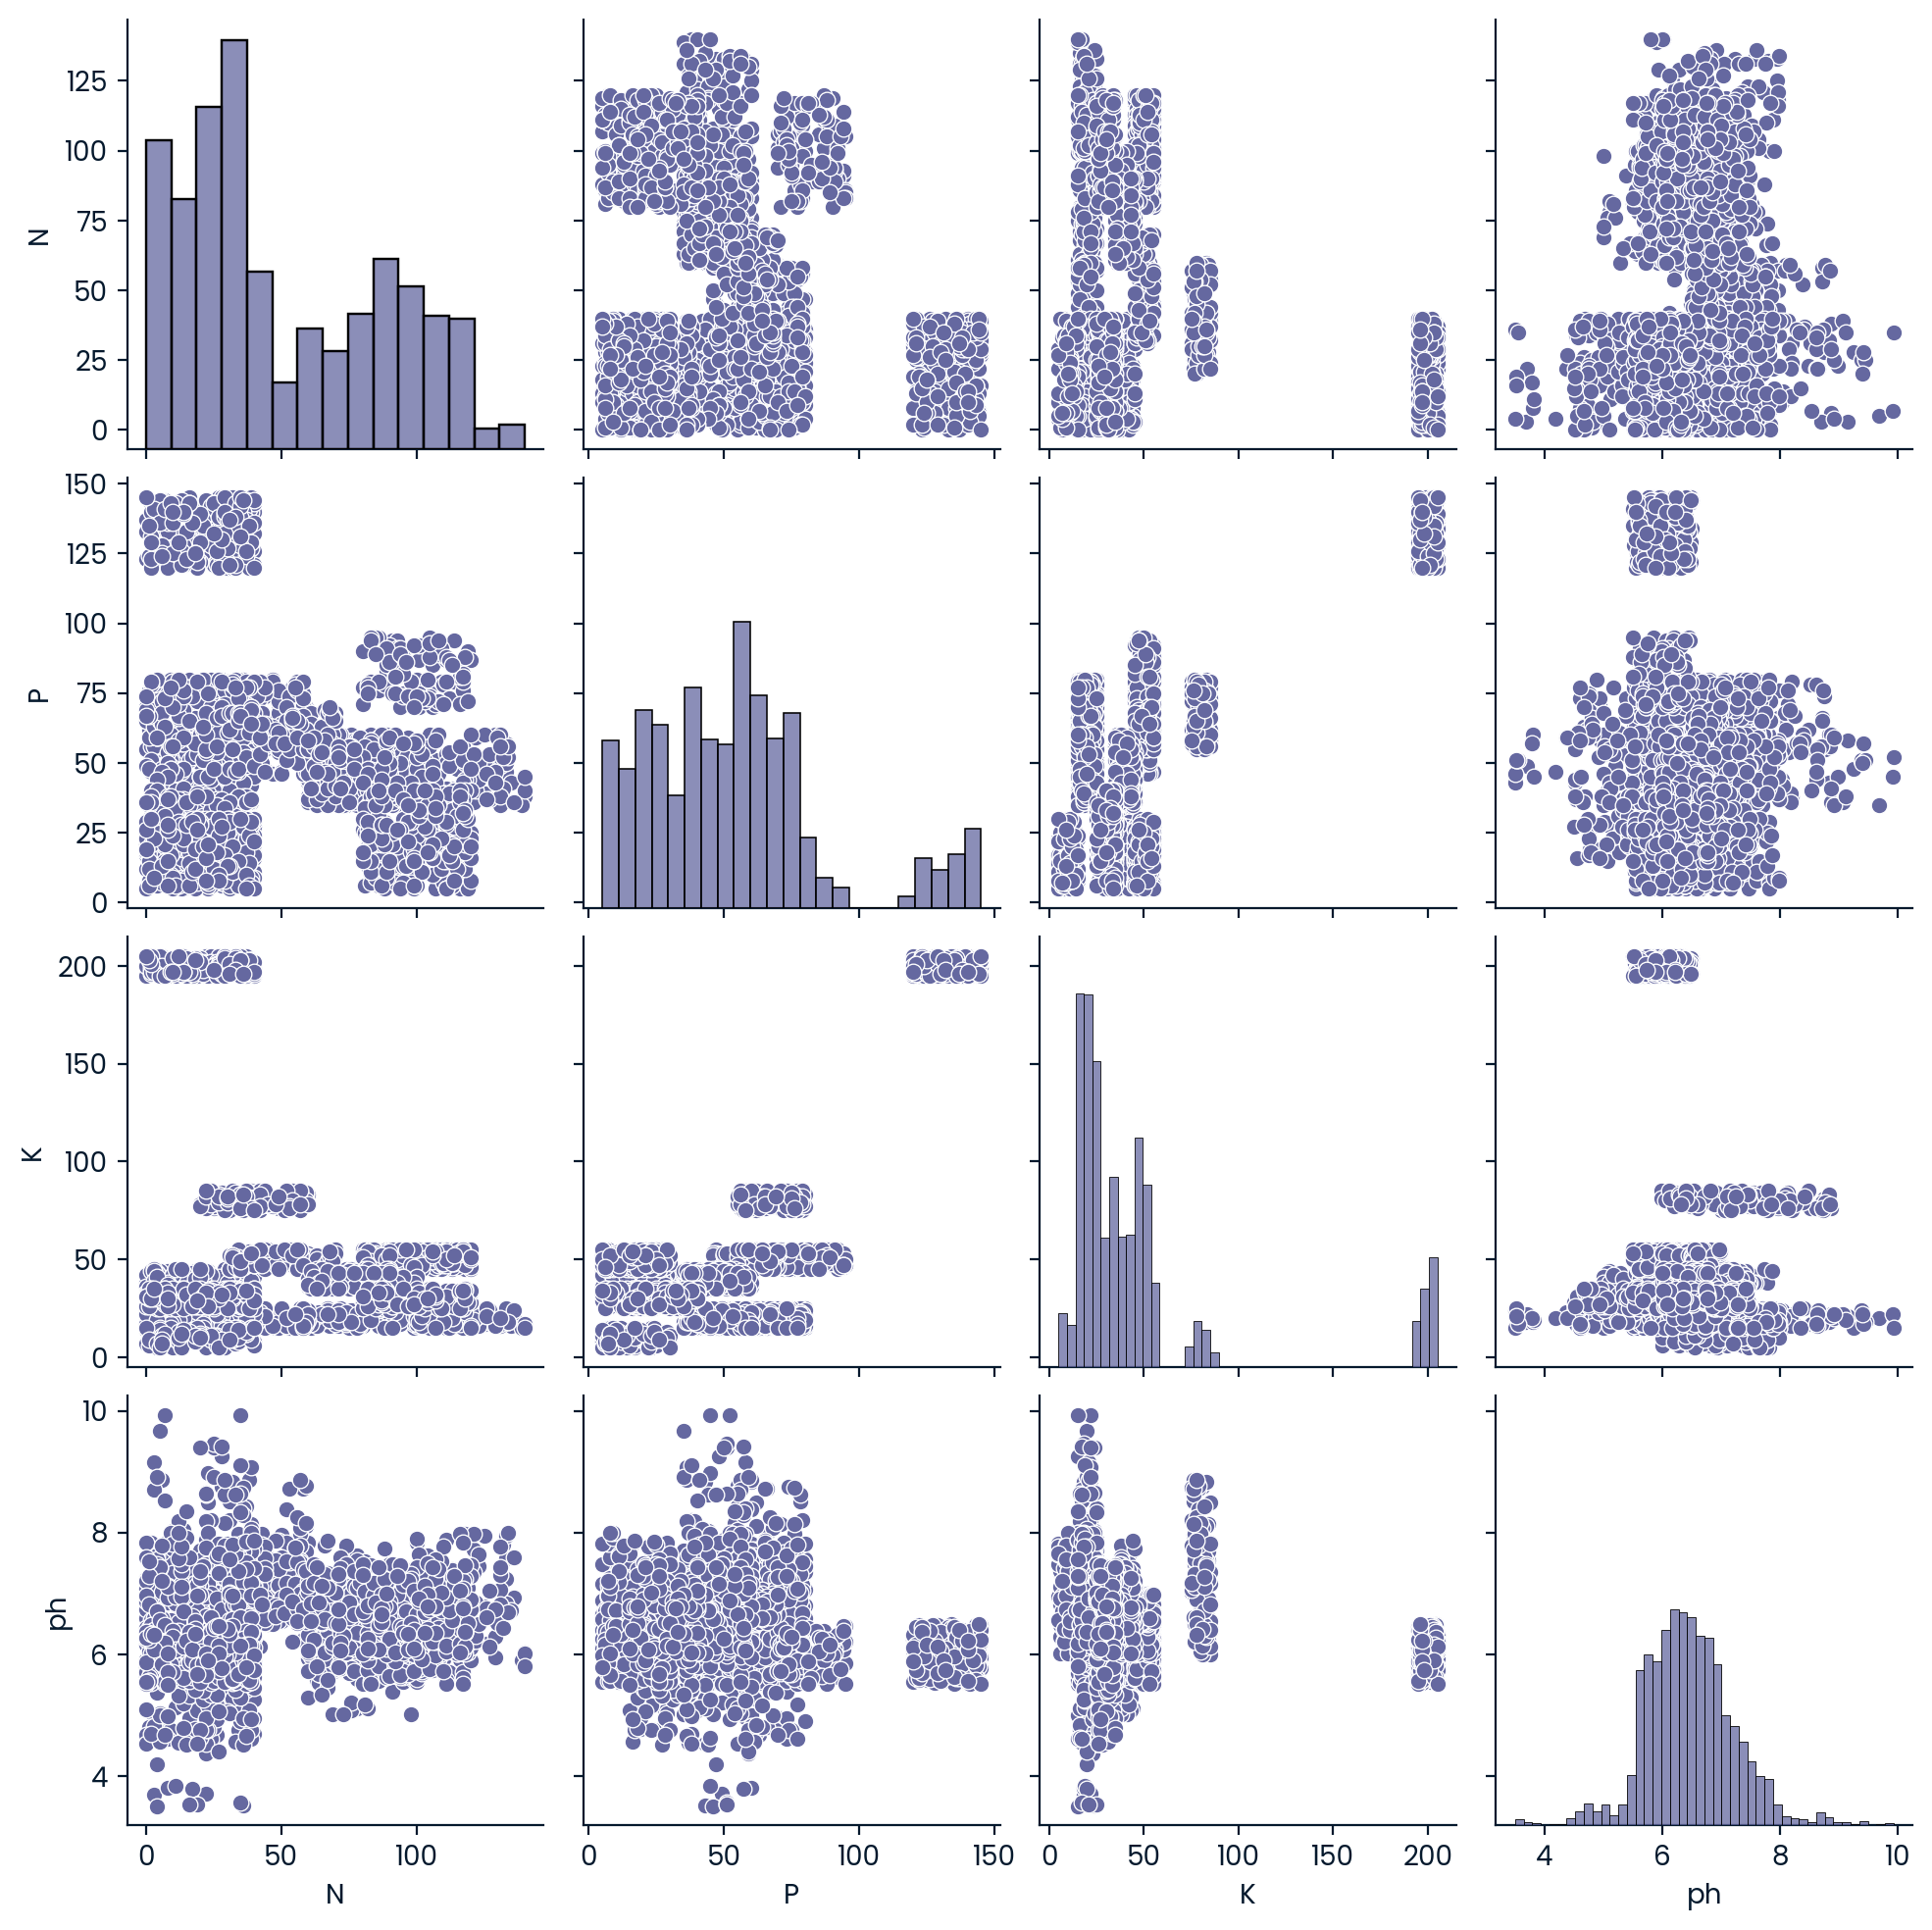

In [136]:
import seaborn as sns

sns.pairplot(crops)

In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

crops["N"] = scaler.fit_transform(crops[["N"]])
crops["P"] = scaler.fit_transform(crops[["P"]])
crops["K"] = scaler.fit_transform(crops[["K"]])
crops["ph"] = scaler.fit_transform(crops[["ph"]])

In [138]:
crops.head()

,N,P,K,ph,crop
0,1.068797,-0.344551,-0.101688,0.043302,rice
1,0.933329,0.140616,-0.141185,0.734873,rice
2,0.255986,0.049647,-0.081939,1.771510,rice
3,0.635298,-0.556811,-0.160933,0.660308,rice
4,0.743673,-0.344551,-0.121436,1.497868,rice


## Model

We now split the data into 80% for training and 20% for testing

In [139]:
X = crops.drop("crop", axis=1)
y = crops["crop"]

In [140]:
X.head()

,N,P,K,ph
0,1.068797,-0.344551,-0.101688,0.043302
1,0.933329,0.140616,-0.141185,0.734873
2,0.255986,0.049647,-0.081939,1.771510
3,0.635298,-0.556811,-0.160933,0.660308
4,0.743673,-0.344551,-0.121436,1.497868


In [141]:
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: crop, dtype: object

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Now, we train a RidgeClassifier using only one feature. We obtain the F1 score for that prediction and we then try with another feature. When we have tried all features (and we have all F1 scores), we can compare the scores to get the feature that best predicts the crop.

In [143]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

scores = {}
best_score = 0
best_feature = ""
for i in ["N", "P", "K", "ph"]:
    ridge = RidgeClassifier(alpha=0.1)
    ridge.fit(X_train[[i]].values, y_train)
    y_pred = ridge.predict(X_test[[i]])
    
    scores[i] = [f1_score(y_test, y_pred, average="weighted")]
    if scores[i][0] > best_score:
        best_score = scores[i]
        best_feature = i

In [144]:
scores_df = pd.DataFrame(scores)

scores_df

,N,P,K,ph
0,0.015541,0.015237,0.019089,0.01319


In [145]:
print(f"Best feature: {best_feature}\nBest score: {best_score}")

Best feature: K
Best score: [0.0190889405439155]


In [146]:
best_predictive_feature = {}
best_predictive_feature[best_feature] = best_score[0]
best_predictive_feature

{'K': 0.0190889405439155}